In [2]:
from langgraph.graph import StateGraph ,START,END
from typing import TypedDict,Annotated ,Literal
import google.generativeai as genai
from pydantic import BaseModel,Field
import operator 
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from langchain_core.messages import BaseMessage, SystemMessage , HumanMessage 
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver    # memory save in ram by check pointer

load_dotenv()

## load model 
os.environ["GOOGLE_API_KEY"] = os.getenv("gen_api")

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

/home/user171125/miniconda3/envs/mindenv/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [3]:
class chat_state(TypedDict):
    message : Annotated[list[BaseMessage], add_messages]

In [4]:
def chat_bot(state : chat_state):
    # prompt= SystemMessage(content=f"""you are a friendly bot chatting and answer the user query  """),
    # HumanMessage(content= f"""
    #              reply a user query on the bases of message that user give {state["message"]}
    #              """)
    message =state["message"]
    response = model.invoke(message)
    return {"message" : [response]}

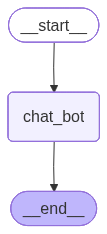

In [11]:
checkpointer = MemorySaver()

graph= StateGraph(chat_state)

graph.add_node("chat_bot",chat_bot)

graph.add_edge(START,"chat_bot")
graph.add_edge("chat_bot",END)

workflow = graph.compile(checkpointer=checkpointer)

workflow

In [12]:
# initial_state= {
#     "message": [HumanMessage(content="tell me the capital of china")]
# }
# workflow.invoke(initial_state)['message'][-1].content

In [18]:
thread_id= "1"

while True:
    user_input = input("ask anything")
    
    if user_input.strip().lower() in ["bye","quit","exit","n"]:
        break
    
    config = {"configurable":{"thread_id":thread_id}}
    response = workflow.invoke({'message':[HumanMessage(content=user_input)]},config=config)
    ai = response['message'][-1].content
    print(ai)

Hi there! How can I help you today?
